# Анализ данных и обучение модели

In [113]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

## Визуализация пампов

Для примера загрузим монету KNC.

In [114]:
df = pd.read_csv("../data/binance_data/KNCUSDT/KNCUSDT_5m_full.csv")

In [115]:
df.head()

,timestamp,open,high,low,close,volume,taker_buy_volume,open_interest,long_short_ratio,taker_sell_volume,volume_delta
0,2025-01-31 00:00:00,0.5056,0.5084,0.5056,0.5084,83518,61319,NaN,NaN,22199,39120
1,2025-01-31 00:05:00,0.5084,0.5084,0.5052,0.5053,25152,8134,5589780.0,1.763714,17018,-8884
2,2025-01-31 00:10:00,0.5053,0.5059,0.5042,0.5045,23468,14053,5594554.0,1.766031,9415,4638
3,2025-01-31 00:15:00,0.5045,0.5057,0.5039,0.5052,24414,14373,5591035.0,1.764789,10041,4332
4,2025-01-31 00:20:00,0.5049,0.5063,0.5044,0.5063,9068,3377,5589663.0,1.760986,5691,-2314


In [116]:
df.isna().sum()

timestamp              0
open                   0
high                   0
low                    0
close                  0
volume                 0
taker_buy_volume       0
open_interest        187
long_short_ratio     198
taker_sell_volume      0
volume_delta           0
dtype: int64

In [117]:
df[df.isna()["open_interest"]]

,timestamp,open,high,low,close,volume,taker_buy_volume,open_interest,long_short_ratio,taker_sell_volume,volume_delta
0,2025-01-31 00:00:00,0.5056,0.5084,0.5056,0.5084,83518,61319,NaN,NaN,22199,39120
288,2025-02-01 00:00:00,0.5065,0.5072,0.5050,0.5061,82510,38790,NaN,NaN,43720,-4930
576,2025-02-02 00:00:00,0.4716,0.4745,0.4705,0.4745,92954,55463,NaN,NaN,37491,17972
864,2025-02-03 00:00:00,0.4317,0.4320,0.4253,0.4253,216483,112487,NaN,NaN,103996,8491
1152,2025-02-04 00:00:00,0.4427,0.4457,0.4426,0.4452,119385,81639,NaN,NaN,37746,43893
...,...,...,...,...,...,...,...,...,...,...,...
50400,2025-07-25 00:00:00,0.4186,0.4190,0.4167,0.4167,307097,152601,NaN,NaN,154496,-1895
50688,2025-07-26 00:00:00,0.4323,0.4571,0.4311,0.4326,8236043,4506981,NaN,NaN,3729062,777919
50976,2025-07-27 00:00:00,0.4353,0.4353,0.4296,0.4298,449645,179068,NaN,NaN,270577,-91509
51264,2025-07-28 00:00:00,0.4431,0.4637,0.4430,0.4491,6957044,3736487,NaN,NaN,3220557,515930


Видим, что пропуски находятся в первой свече каждого дня. Заполним пропуски предыдущими значениями. Самую первую строку с пропущенными значениями удалим.

In [118]:
df = df.ffill().dropna()

In [119]:
df.isna().sum()

timestamp            0
open                 0
high                 0
low                  0
close                0
volume               0
taker_buy_volume     0
open_interest        0
long_short_ratio     0
taker_sell_volume    0
volume_delta         0
dtype: int64

In [120]:
df.describe()

,open,high,low,close,volume,taker_buy_volume,open_interest,long_short_ratio,taker_sell_volume,volume_delta
count,51839.000000,51839.000000,51839.000000,51839.000000,5.183900e+04,5.183900e+04,5.183900e+04,51839.000000,5.183900e+04,5.183900e+04
mean,0.366645,0.367328,0.365949,0.366641,1.365239e+05,6.790827e+04,7.744069e+06,1.644608,6.861565e+04,-7.073749e+02
std,0.055719,0.056165,0.055285,0.055717,1.011402e+06,5.058333e+05,3.491516e+06,0.332306,5.084468e+05,7.640326e+04
min,0.258400,0.261200,0.257100,0.258600,2.190000e+02,3.100000e+01,0.000000e+00,0.975600,0.000000e+00,-3.952863e+06
25%,0.324500,0.325000,0.324100,0.324500,1.228000e+04,5.506000e+03,6.301989e+06,1.365648,5.448500e+03,-5.658500e+03
50%,0.360400,0.361000,0.359800,0.360400,2.251000e+04,1.078000e+04,7.018784e+06,1.664649,1.089700e+04,-3.900000e+01
75%,0.403000,0.404000,0.401950,0.403000,4.612600e+04,2.284100e+04,7.554502e+06,1.850272,2.362200e+04,5.188000e+03
max,0.702200,0.720000,0.665900,0.702200,4.451810e+07,2.330628e+07,3.748860e+07,2.607611,2.409028e+07,3.487798e+06


In [121]:
def find_pumps(df: pd.DataFrame, min_growth=0.10, window=4):
    """
    Находит индексы пампов в датафрейме
    """
    close = df["close"].to_numpy()
    start_prices = close[:-window]
    end_prices = close[window:]

    growth = (end_prices - start_prices) / start_prices
    pump_indices = np.where(growth >= min_growth)[0] + window  # смещение на window, сохраняем индекс последней свечи в пампе

    return pump_indices.tolist()

In [122]:
# Ищем пампы на 10% за 20 минут (4 пятиминутных свечи)
pumps = find_pumps(df, min_growth=0.10, window=4)

In [123]:
len(pumps)

23

In [124]:
def plot_candles(df: pd.DataFrame, start_idx: int, end_idx: int, pump_idx: int = None):
    """
    Строит график свечей, объёма, open_interest и volume_delta.
    Рисует вертикальную линию на индексе пампа, если указан.
    """
    df = df.copy().iloc[start_idx:end_idx]
    df.index = pd.to_datetime(df["timestamp"])

    added_plots = []

    added_plots.append(mpf.make_addplot(df["open_interest"], panel=2, type="bar", ylabel="Open Interest"))
    added_plots.append(mpf.make_addplot(df["volume_delta"], panel=3, type="bar", ylabel="Volume Delta"))

    vlines = []
    if pump_idx is not None and start_idx <= pump_idx < end_idx:
        pump_time = pd.to_datetime(df.iloc[pump_idx - start_idx]["timestamp"])
        vlines = dict(vlines=[pump_time], colors=["r"], linestyle="--")

    mpf.plot(
        df,
        type="candle",
        volume=True,
        addplot=added_plots,
        style="yahoo",
        figsize=(12, 8),
        title="Candles + Open Interest + Volume Delta",
        panel_ratios=(3, 1, 1, 1),
        vlines=vlines,
        tight_layout=True,
    )

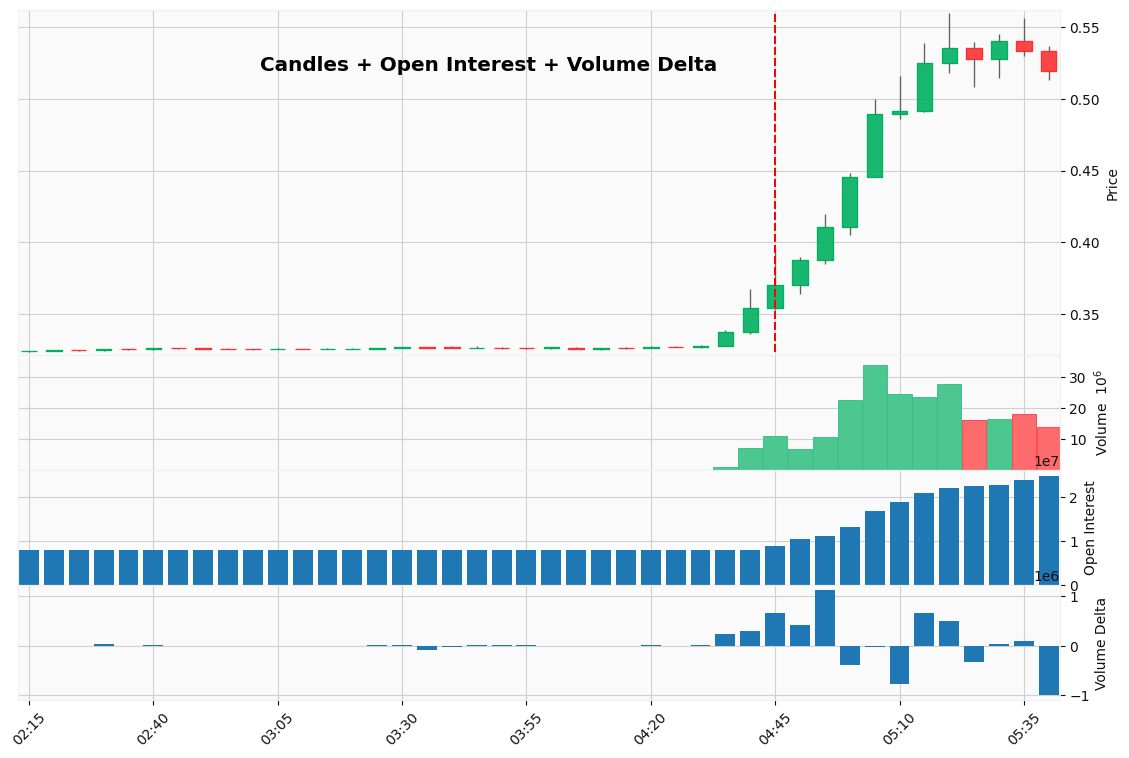

In [125]:
# Берем 30 свечей до пампа и 12 свечей после
index = 0
start_index = pumps[index] - 30
end_index = pumps[index] + 12
pump_index = pumps[index]

plot_candles(df, start_index, end_index, pump_index)

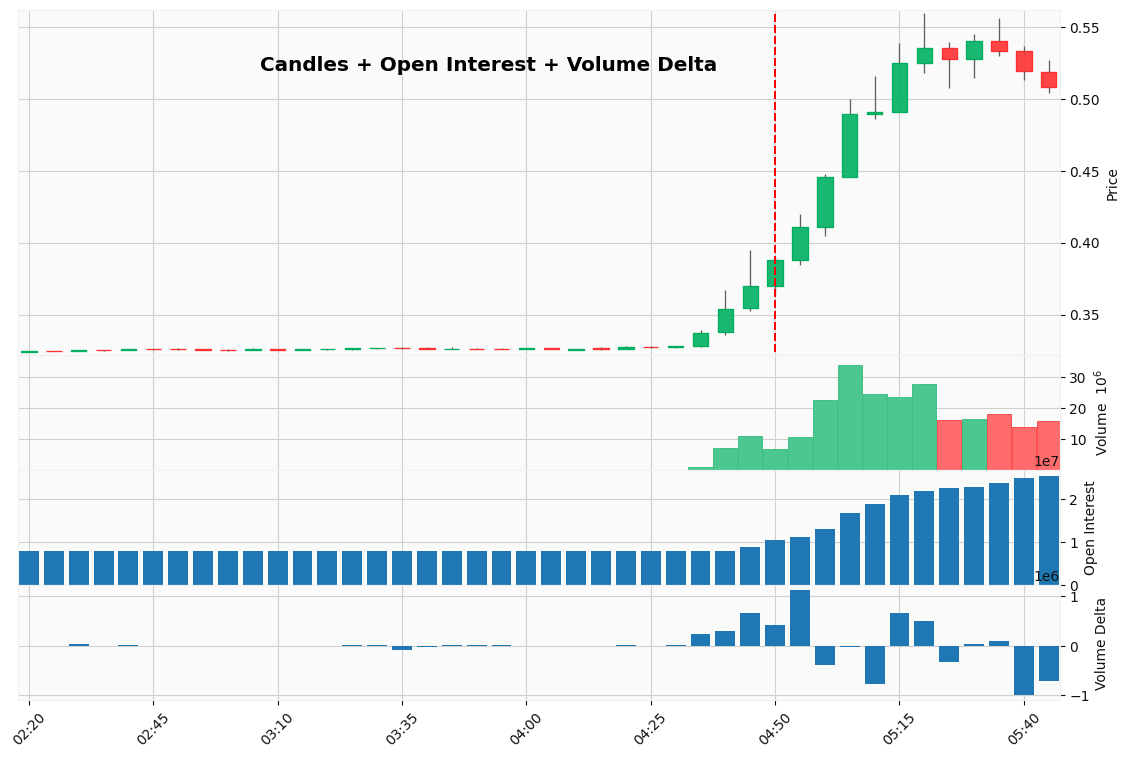

In [126]:
# Берем 30 свечей до пампа и 12 свечей после
index = 1
start_index = pumps[index] - 30
end_index = pumps[index] + 12
pump_index = pumps[index]

plot_candles(df, start_index, end_index, pump_index)

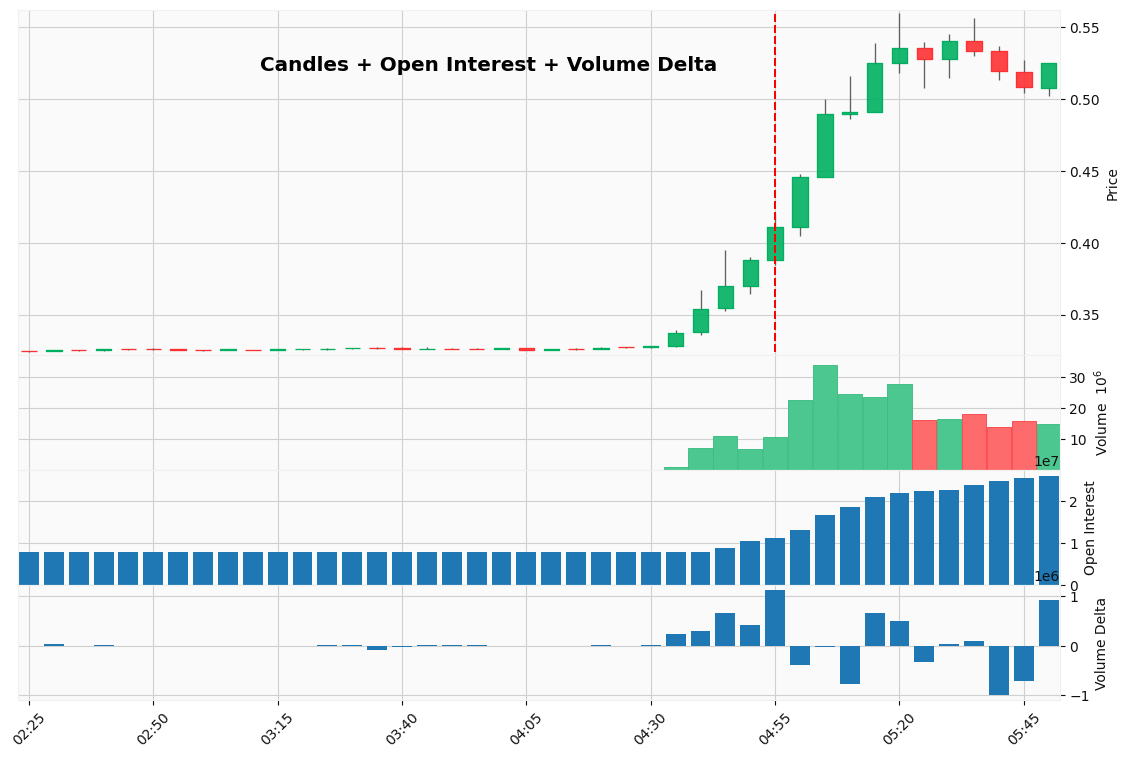

In [127]:
# Берем 30 свечей до пампа и 12 свечей после
index = 2
start_index = pumps[index] - 30
end_index = pumps[index] + 12
pump_index = pumps[index]

plot_candles(df, start_index, end_index, pump_index)

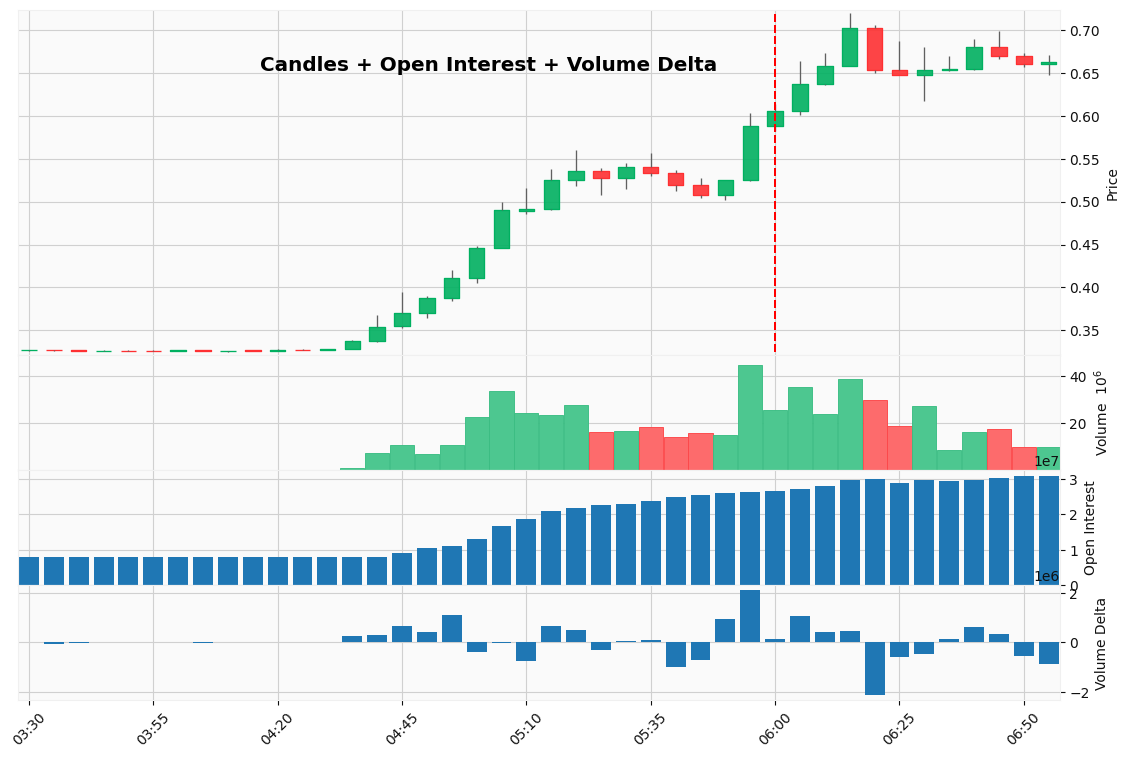

In [128]:
# Берем 30 свечей до пампа и 12 свечей после
index = 10
start_index = pumps[index] - 30
end_index = pumps[index] + 12
pump_index = pumps[index]

plot_candles(df, start_index, end_index, pump_index)

Как видим, такой алгоритм будет давать сигналы много раз на протяжении одного длительного пампа. Обучение модели на всех таких сигналов может привести к переобучению, поэтому имеет смысл в тренировочный датасет сохранить сигналы с некоторым промежутком между ними.

In [129]:
def find_pumps(
    df: pd.DataFrame,
    min_growth: float = 0.10,
    window: int = 4,
    cool_down: int = 4,
    full_window: int = 30,
    target_window: int = 12
) -> list[int]:
    """
    Находит индексы пампов в датафрейме.
    
    Параметры:
    - min_growth: минимальный рост цены (например, 0.10 = 10%)
    - window: количество баров в пампе (например, 4 = 20 минут)
    - cool_down: сколько свечей пропустить после найденного пампа
    - full_window: количество баров, из которых будут формироваться признаки
    - target_window: сколько свечей нужно после пампа для построения целевой переменной

    Возвращает:
    - Список индексов, соответствующих последней свече пампа
    """
    close = df["close"].to_numpy()
    pumps = []
    i = full_window

    while i < len(close) - target_window:
        start_price = close[i - window]
        end_price = close[i]
        growth = (end_price - start_price) / start_price

        if growth >= min_growth:
            pumps.append(i)
            i += cool_down
        else:
            i += 1

    return pumps

In [130]:
pumps = find_pumps(df)

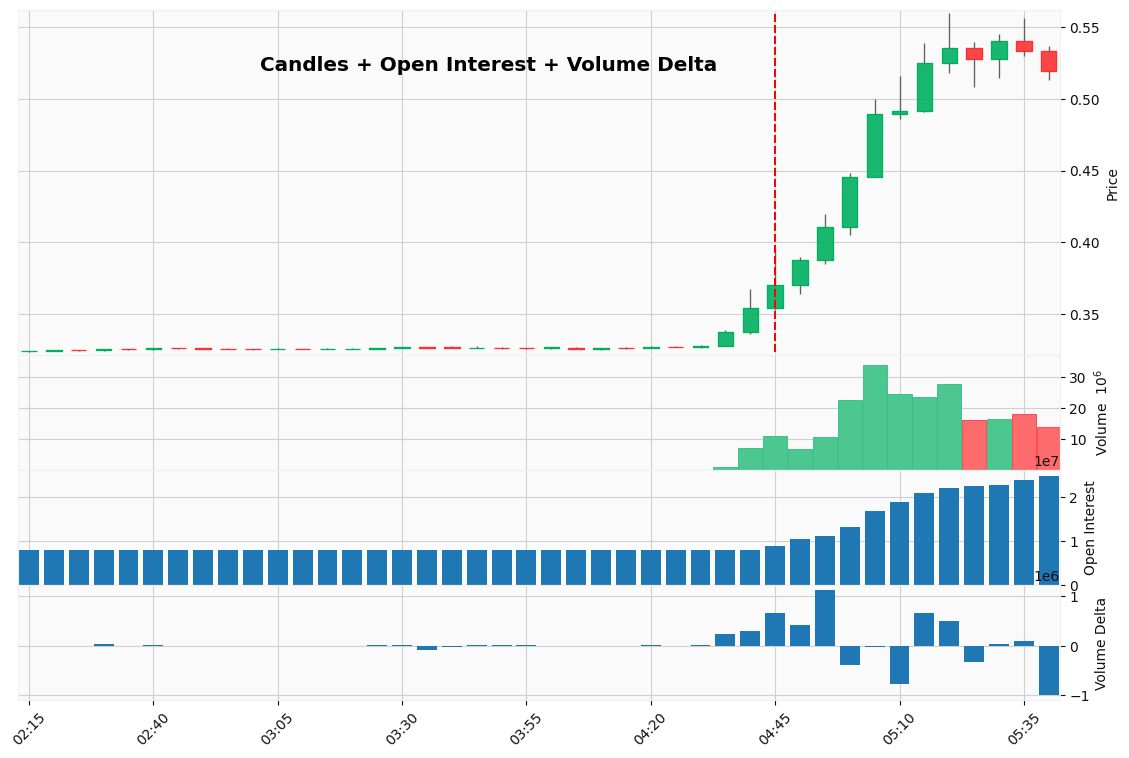

In [131]:
index = 0
start_index = pumps[index] - 30
end_index = pumps[index] + 12
pump_index = pumps[index]

plot_candles(df, start_index, end_index, pump_index)

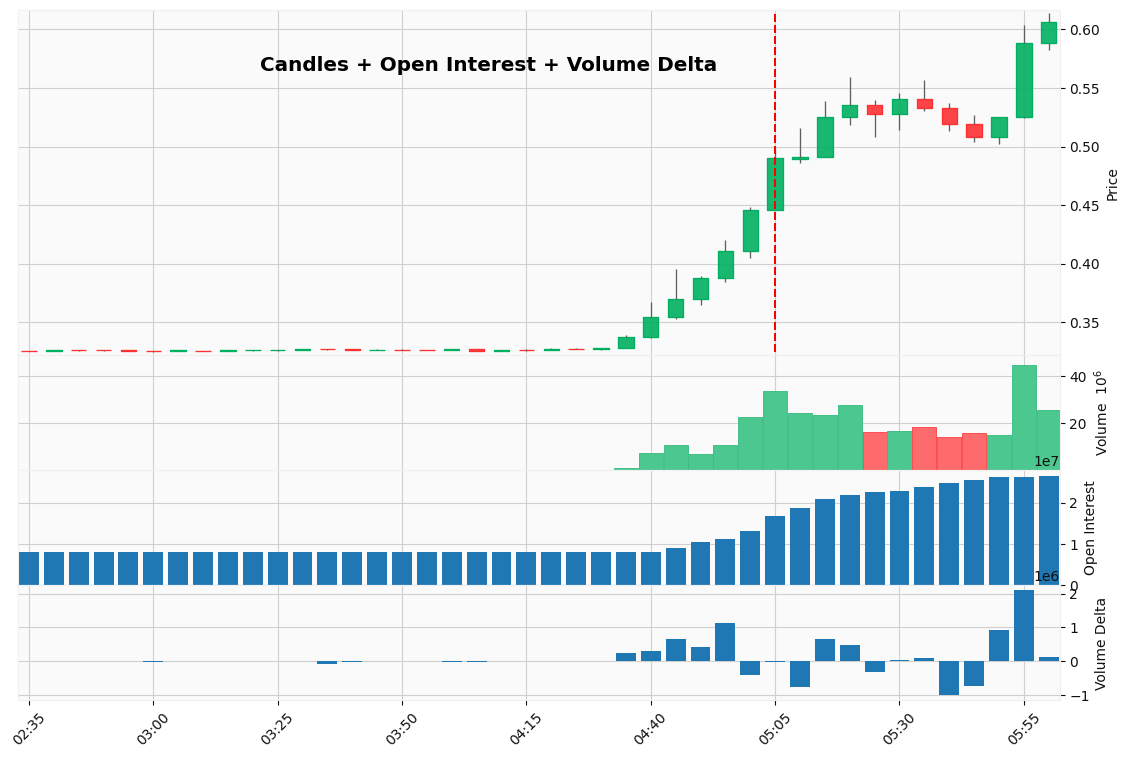

In [132]:
index = 1
start_index = pumps[index] - 30
end_index = pumps[index] + 12
pump_index = pumps[index]

plot_candles(df, start_index, end_index, pump_index)

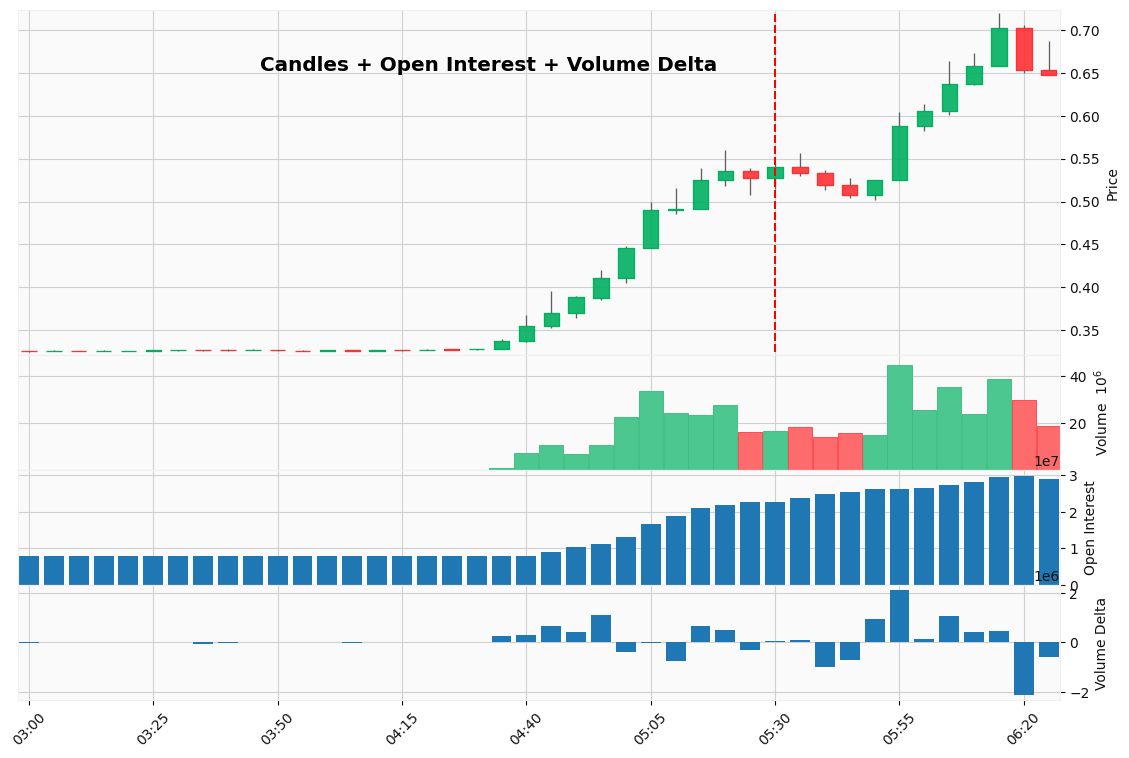

In [133]:
index = 2
start_index = pumps[index] - 30
end_index = pumps[index] + 12
pump_index = pumps[index]

plot_candles(df, start_index, end_index, pump_index)

Как видим, теперь в пределах одного пампа сигналы находятся на некотором расстоянии друг от друга. Это позволит уменьшить вероятность переобучения.

## Генерация целевой переменной

Создадим функцию для генерации целевой переменной.  
1 - в течение часа цена упадет на 50% от величины пампа раньше, чем вырастет.  
0 - все остальные случаи.

In [134]:
def generate_target(
    df: pd.DataFrame,
    pump_idx: int,
    window: int = 4,
    target_window: int = 12,
    threshold: float = 0.5
) -> int | None:
    """
    Генерирует целевую переменную:
    1 — если цена упала на threshold * памп раньше, чем выросла.
    0 — иначе (выросла или флет).
    """

    low = df["low"].to_numpy()
    high = df["high"].to_numpy()
    close = df["close"].to_numpy()

    if pump_idx - window < 0 or pump_idx + target_window >= len(close):
        return None

    pump_start_price = close[pump_idx - window]
    pump_peak_price = close[pump_idx]
    pump_range = pump_peak_price - pump_start_price

    down_target = pump_peak_price - pump_range * threshold
    up_target = pump_peak_price + pump_range * threshold

    future_lows = low[pump_idx + 1: pump_idx + 1 + target_window]
    future_highs = high[pump_idx + 1: pump_idx + 1 + target_window]

    for i in range(len(future_lows)):
        if future_highs[i] >= up_target:
            return 0
        if future_lows[i] <= down_target:
            return 1
        

    return 0  # если ни падения, ни роста — считаем флетом

Target: 0


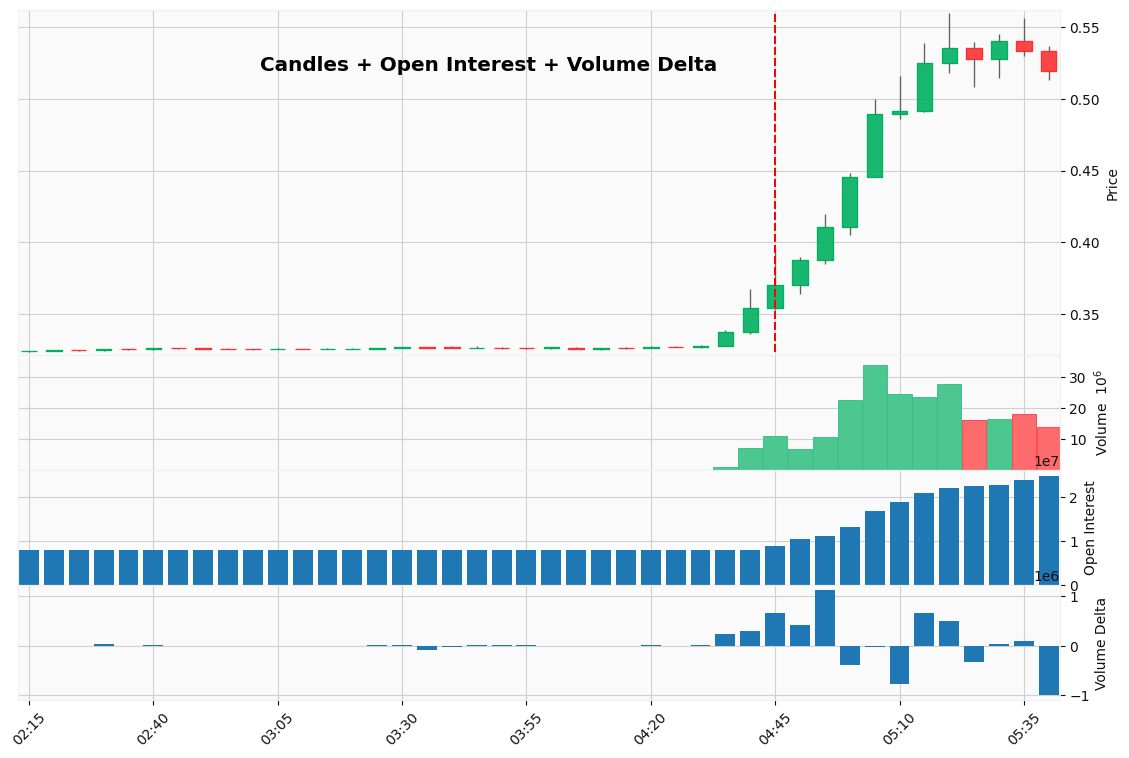

In [135]:
index = 0
start_index = pumps[index] - 30
end_index = pumps[index] + 12
pump_index = pumps[index]

target = generate_target(df, pump_index)
print("Target:", target)
plot_candles(df, start_index, end_index, pump_index)

Target: 1


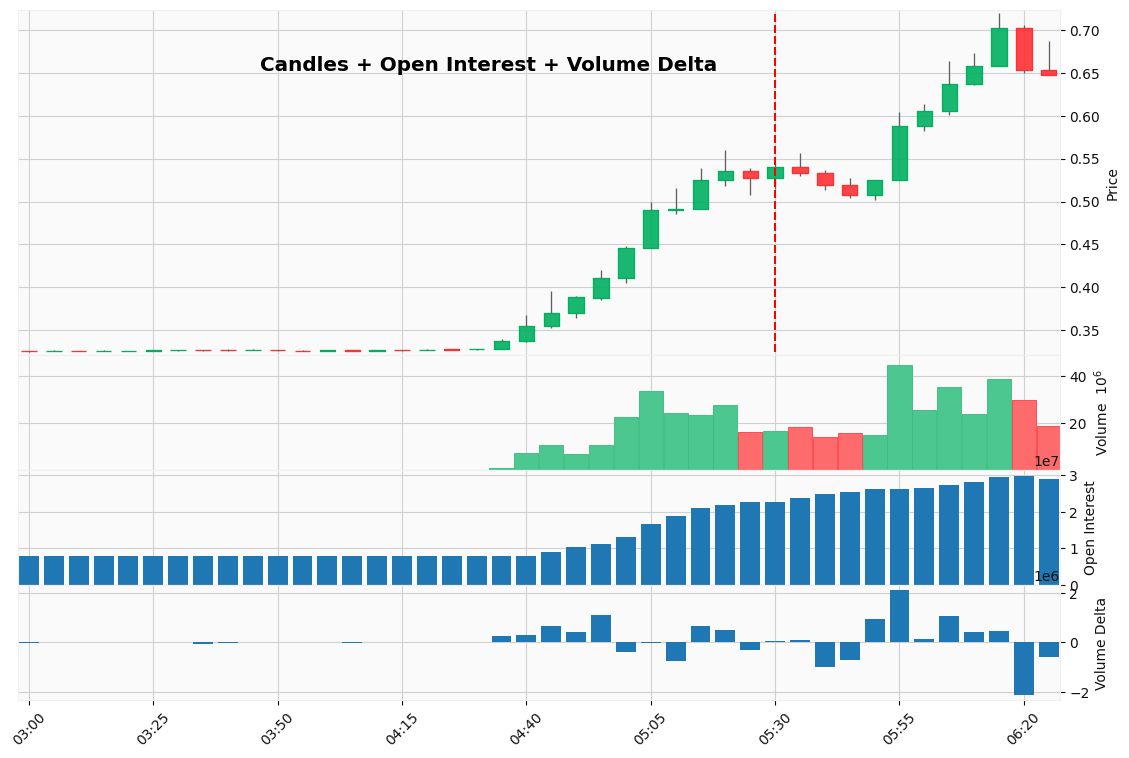

In [136]:
index = 2
start_index = pumps[index] - 30
end_index = pumps[index] + 12
pump_index = pumps[index]

target = generate_target(df, pump_index)
print("Target:", target)
plot_candles(df, start_index, end_index, pump_index)

Target: 1


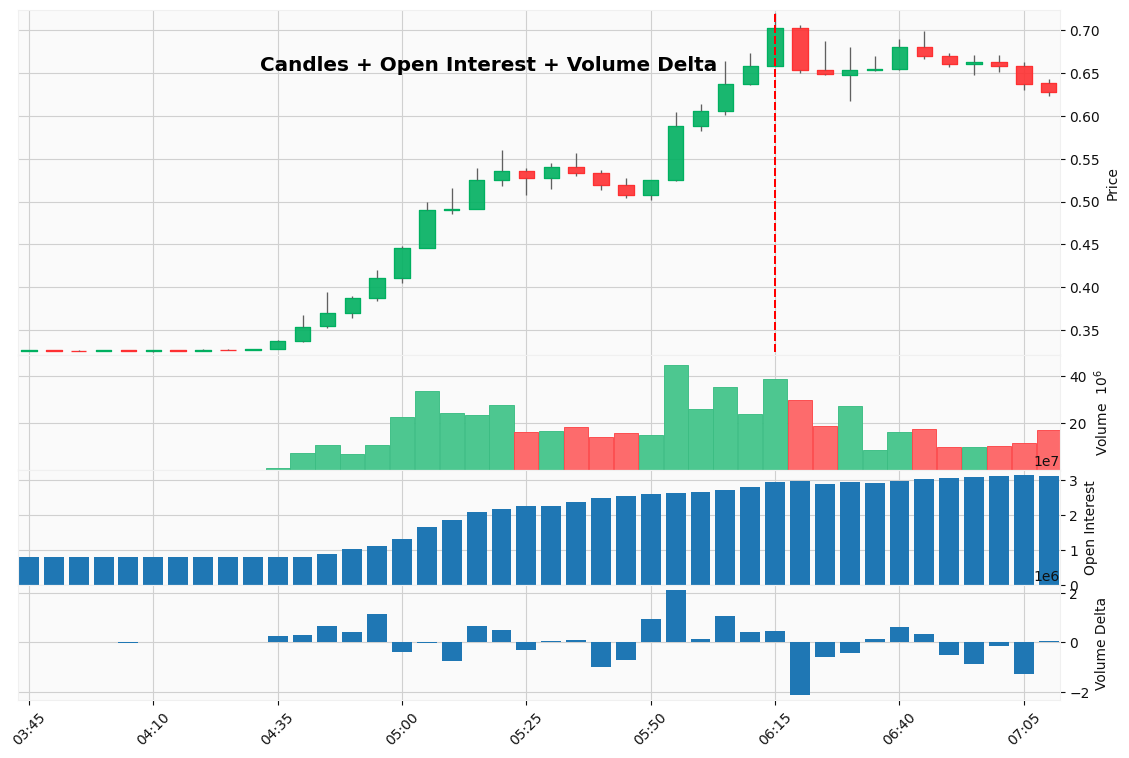

In [137]:
index = 4
start_index = pumps[index] - 30
end_index = pumps[index] + 12
pump_index = pumps[index]

target = generate_target(df, pump_index)
print("Target:", target)
plot_candles(df, start_index, end_index, pump_index)

## Визуализация готового датасета

С помощью модуля data_fetcher/dataset_generator.py были сгенерированы матрицы признаков для всех пампов. Визуализируем некоторые из них.

In [141]:
pumps_matrices = os.listdir("../data/dataset/0")
print(f"Class 0: {len(pumps_matrices)}")
pumps_matrices = os.listdir("../data/dataset/1")
print(f"Class 1: {len(pumps_matrices)}")

Class 0: 960
Class 1: 842


### Визуализация класса 0

In [142]:
path = "../data/dataset/0/1000CATUSDT_2680.csv"
df = pd.read_csv(path, index_col=0)

In [143]:
df

,open,high,low,close,volume,open_interest,volume_delta
2651,0.01107,0.01108,0.01104,0.01104,3939672,606970566.0,-2963260
2652,0.01105,0.01113,0.01103,0.01110,12053212,607248364.0,973402
2653,0.01109,0.01110,0.01107,0.01107,5142749,607692601.0,-1028379
2654,0.01108,0.01108,0.01103,0.01105,5457902,607966235.0,-1581216
2655,0.01105,0.01106,0.01099,0.01101,4861554,607288685.0,-2175092
2656,0.01102,0.01109,0.01102,0.01107,4233864,607522194.0,1318978
2657,0.01107,0.01110,0.01103,0.01104,8851366,607257650.0,1061934
2658,0.01104,0.01107,0.01098,0.01099,11825100,608807339.0,-5610562
2659,0.01099,0.01102,0.01098,0.01098,5394361,607525122.0,239511
2660,0.01099,0.01100,0.01094,0.01099,10168627,607916789.0,-1235885


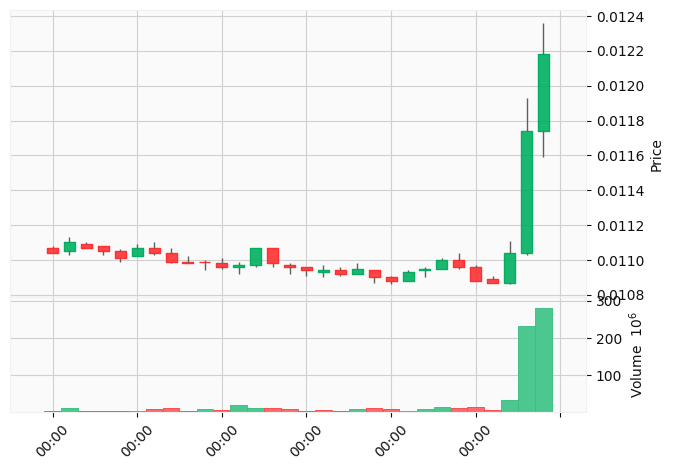

In [144]:
df.index = pd.to_datetime(df.index)  # Для совместимости с mpf.plot, не дает реальные временые метки
mpf.plot(df, type="candle", volume=True, style="yahoo")

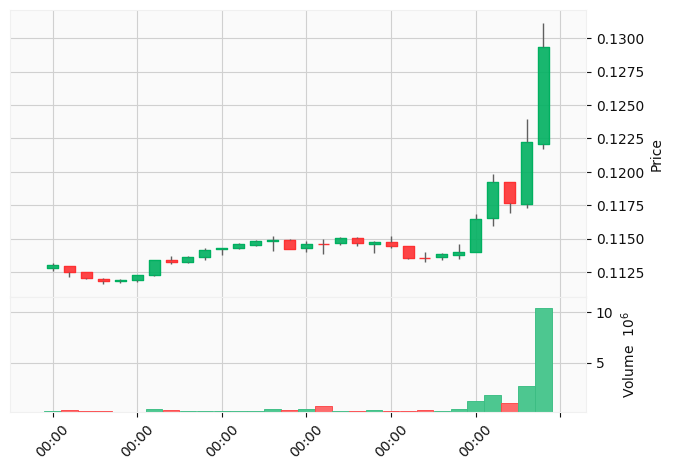

In [145]:
path = "../data/dataset/0/BIDUSDT_34067.csv"
df = pd.read_csv(path, index_col=0)
df.index = pd.to_datetime(df.index)  # Для совместимости с mpf.plot, не дает реальные временые метки
mpf.plot(df, type="candle", volume=True, style="yahoo")

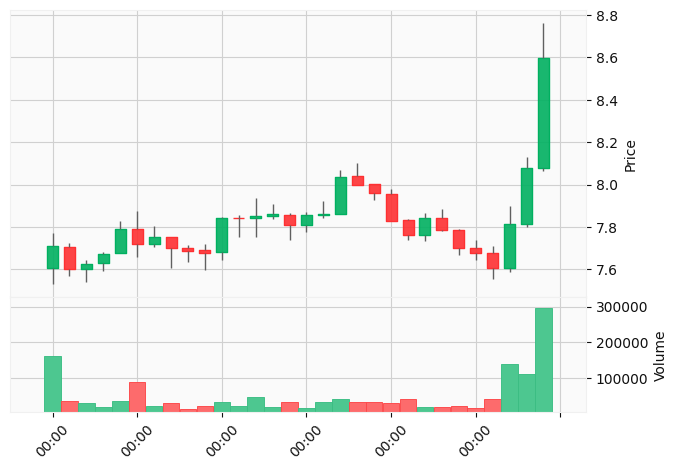

In [146]:
path = "../data/dataset/0/XVSUSDT_3705.csv"
df = pd.read_csv(path, index_col=0)
df.index = pd.to_datetime(df.index)  # Для совместимости с mpf.plot, не дает реальные временые метки
mpf.plot(df, type="candle", volume=True, style="yahoo")

### Визуализация класса 1

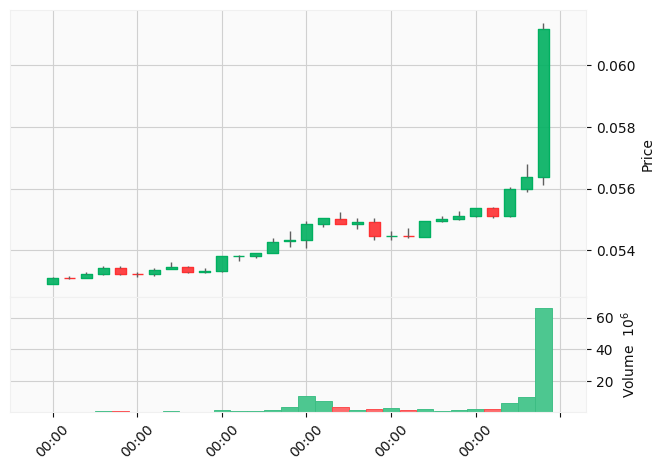

In [148]:
path = "../data/dataset/1/ACTUSDT_28136.csv"
df = pd.read_csv(path, index_col=0)
df.index = pd.to_datetime(df.index)  # Для совместимости с mpf.plot, не дает реальные временые метки
mpf.plot(df, type="candle", volume=True, style="yahoo")

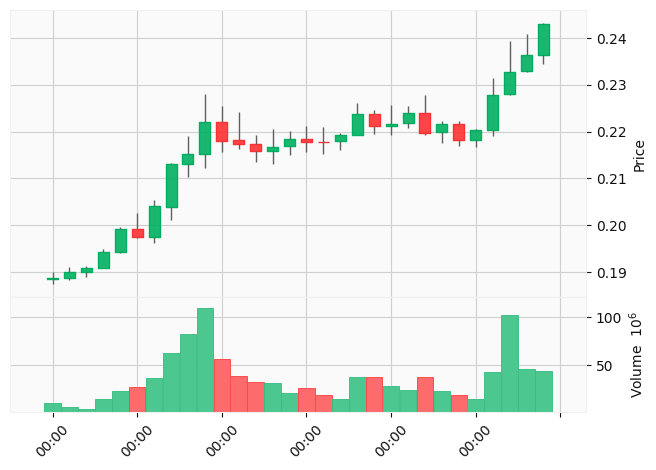

In [150]:
path = "../data/dataset/1/MAGICUSDT_23180.csv"
df = pd.read_csv(path, index_col=0)
df.index = pd.to_datetime(df.index)  # Для совместимости с mpf.plot, не дает реальные временые метки
mpf.plot(df, type="candle", volume=True, style="yahoo")

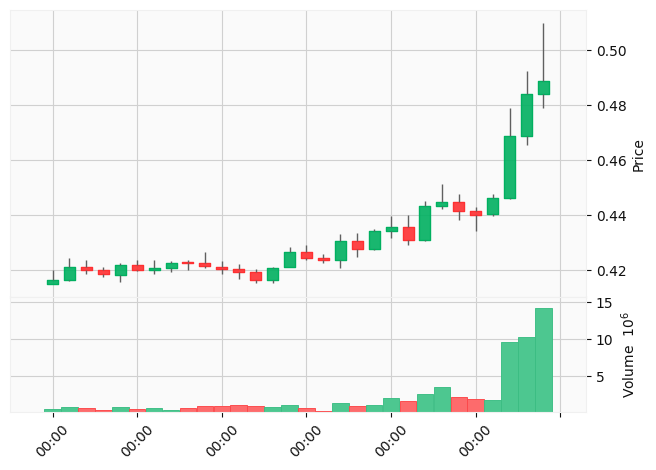

In [151]:
path = "../data/dataset/1/SHELLUSDT_275.csv"
df = pd.read_csv(path, index_col=0)
df.index = pd.to_datetime(df.index)  # Для совместимости с mpf.plot, не дает реальные временые метки
mpf.plot(df, type="candle", volume=True, style="yahoo")